In [1]:
import nbsetup as nb
import numpy as np
import ensemblepy as ep
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from simulations.automata.models import CA1DEnsemble
import warnings
warnings.filterwarnings('ignore')

In [2]:
import numpy as np
np.random.seed(4020)

In [3]:
def cas_for_p(rule=226, cells=100, ensembles=20, steps=100, increments=100):
    cas = {}
    ps = np.linspace(0.0, 1.0, increments)
    for p in ps:
        nb.cp(p)
        # generate ensembles for each increment of p
        ca = CA1DEnsemble(rule=rule, cells=cells, count=ensembles, init='sparse',p=p)
        ca.run(steps)
        ca.analyse()
        cas[p] = ca
    return cas

def plot_complexity(cas, ignore_unstables=True, xlim=(0.1, 0.9), ylim=(0,1)):
    fig = plt.figure()
    dataframe = pd.concat([c.get_analysis('complexity') for c in cas.values()], ignore_index=True)
    dataframe['p'] = cas.keys()
    h = sns.lineplot(data=dataframe.melt(id_vars='p'), x='p', y='value', hue='variable', palette='mako')
    sns.lineplot(y=dataframe.drop(columns='p').sum(axis=1), x=dataframe['p'], label="Sum")
    h.set(xlim=xlim, ylim=ylim)
    return dataframe, fig

# Initial conditions

One of the hypothesis of ergodic complexity, is that complex cases are so tricky to comes to grips with because they are particularly sensitive to initial conditions. Put in the terms of statistical / termodyanmics terminology, given differences in micro-variables (like initial positions of particles) even when macro-variables (like total number of particles) is consistent, the end results of the system does not converge across ensembles.

Scanning across the results of _p_ (p is the % of cells that start as a 1 rather than a 0), we find that for the example disordered case (rule 30) and the mechanistic simple case (rule 0) this holds as we expect in the thermodynamic case.

1.0


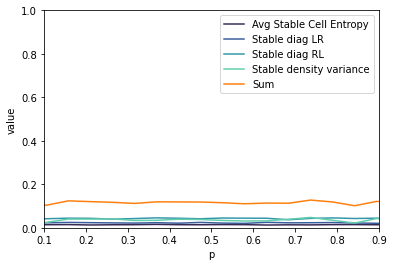

In [4]:
cas30 = cas_for_p(rule=30, increments=20)
cas30_complexities, cas30fig = plot_complexity(cas30)

1.0


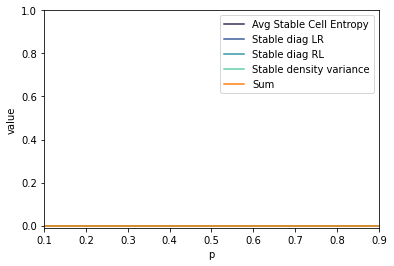

In [5]:
cas0 = cas_for_p(rule=0, increments=20)
cas0_complexities, cas0fig = plot_complexity(cas0, ylim=(-0.01, 1))

## Complex case

However, what we find, is for the ergodically complex case (rule 226) we see that the complexity is high with varying initial conditions.

Here because there are a few ways to calculate entropy, we've calculated the ergodic complexity for each method of entropy calculation and below we are looking at the sum of those calculations.

In [6]:
cas226 = cas_for_p(rule=226, increments=100)

1.0


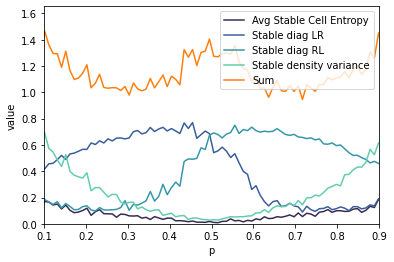

In [7]:
cas226_complexities, cas226fig = plot_complexity(cas226, ylim=(0, None))

# Initial conditions

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


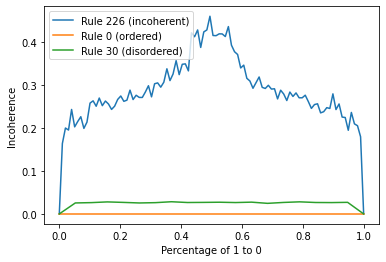

In [8]:
for r, df in (('Rule 226 (incoherent)', cas226_complexities), ('Rule 0 (ordered)', cas0_complexities), ('Rule 30 (disordered)', cas30_complexities)):
    g = sns.lineplot(y=df[['Avg Stable Cell Entropy', 'Stable diag LR', 'Stable diag RL']].mean(axis=1),x=df['p'],label=r)
g.set(xlabel='Percentage of 1 to 0', ylabel='Incoherence')
g.get_figure().savefig('figures/4.3-ca-tipping.eps')

# Tipping point

More specifically, what we find is we see near _p=0.5_ is a spike in complexity, which often indicates a tipping point. More interestingly, we see that the diagonal complexity in particular swaps at this point. Looking at the results we find the following.

Where this pattern creates diagonals, but in particular depending on _p_ the direction of those diagonals changes.

In [16]:
def get_inc(c, label):
    return c.analysis[label].to_list()[-1]

In [19]:
cas226[0.7373737373737375].analysis

,Avg Stable Cell Entropy,Stable diag LR,Stable diag RL,Stable density variance,Kind,Initial
0,0.851804,0.783693,0.000000,0.779956,ensemble,NaN
1,0.770395,0.725053,0.000000,0.693381,ensemble,NaN
2,0.762574,0.684160,0.000000,0.738430,ensemble,NaN
3,0.840688,0.722353,0.000000,0.832396,ensemble,NaN
4,0.697750,0.637172,0.000000,0.690438,ensemble,NaN
5,0.761773,0.719348,0.000000,0.773762,ensemble,NaN
6,0.877876,0.829777,0.000000,0.809119,ensemble,NaN
7,0.758784,0.692293,0.000000,0.662561,ensemble,NaN
8,0.819784,0.734232,0.000000,0.839234,ensemble,NaN
9,0.860648,0.720029,0.000000,0.767244,ensemble,NaN


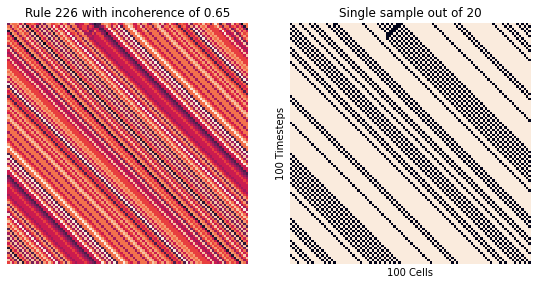

In [18]:
p25 = cas226[0.25252525252525254].plot(inc=get_inc(cas226[0.25252525252525254], 'Stable diag LR')).savefig('figures/4.3-ca-p25.eps')

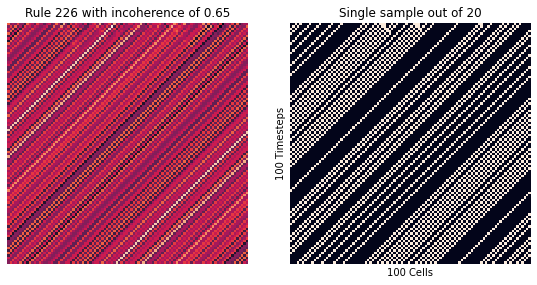

In [20]:
p73 = cas226[0.7373737373737375].plot(inc=get_inc(cas226[0.25252525252525254], 'Stable diag LR')).savefig('figures/4.3-ca-p73.eps')

Where it gets interesting is in the middle, where the stripes become more dense, since the number of stripes is dependant on _p_. We start seeing a small amount of flipping, as illustrated by looking at what you might call ghosting when looking at the heatmap (overlay) of all the ensembles on the left. Where we start seeing some ensembles going the other way.

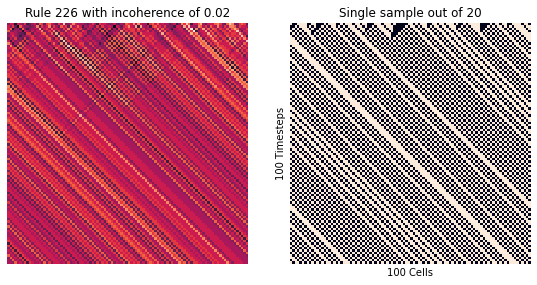

In [11]:
p4 = cas226[0.4141414141414142].plot().savefig('figures/4.3-ca-p41.eps')

While then at the middle, we find this flipping to be at the ergodic complexity peak.

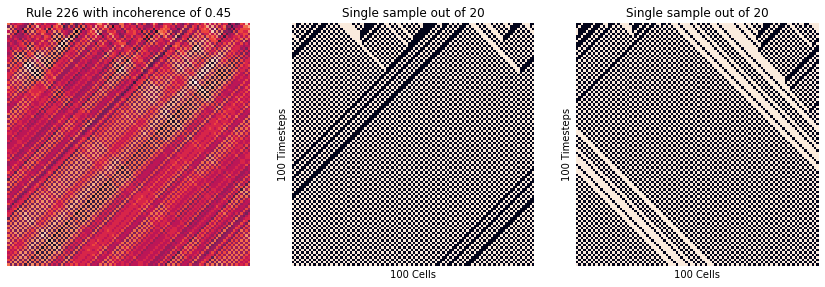

In [25]:
p5 = cas226[0.5050505050505051].plot(0, 3, 0.45).savefig('figures/4.3-ca-p50.eps')

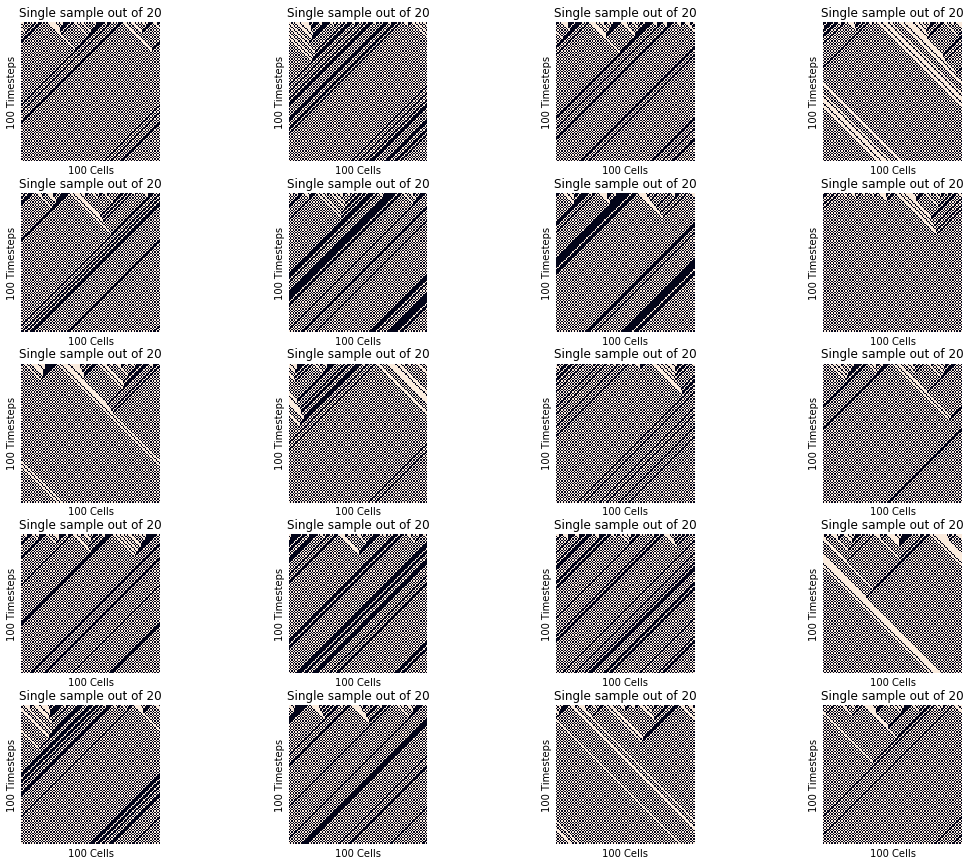

In [24]:

def plot_all(self, columns=5):
    import matplotlib.pyplot as plt
    rows = self.count // columns
    fig, axes = plt.subplots(columns, rows,
            sharex=False, sharey=False, figsize=(3*columns,3*rows))
    plt.tight_layout()
    aflat = axes.flatten()
    for i in range(self.count):
        self.plot_single(i, aflat[i])
    
plot_all(cas226[0.5050505050505051])